In [2]:
cd ~/DATA/Sentinel/ 

/data/store01/data_dirs/students/ucfafyi/Sentinel


In [3]:
import sys
sys.path.insert(0,'python')
from fastRWpkl import *
from smoothn import *
import pylab as plt
%matplotlib inline
import mgrs
import pandas as pd
from scipy import interpolate
from nicer_plot import *

In [46]:
data = parallel_rw_pkl(None, 'NEOW-OAE0518_atm', 'r')

In [48]:
lat, lon = 35.41083,-99.058889
tx = mgrs.MGRS()
mg = tx.toMGRS(lat,lon, MGRSPrecision=4)
imgx = 9999-int(mg[-4:]); imgy = int(mg[-8:-4])
imgx,imgy

(8138, 9465)

In [49]:
mg

'14SME94651861'

In [50]:
aerosols = np.array([[i[0], i[1], i[2][0][0]]for i in data]).T
aero_map = np.zeros((1000, 1000))
aero_map[:,:] = np.nan
aero_map[(aerosols[0]-8001).astype(int), (aerosols[1]-9001).astype(int)] = aerosols[2]

In [51]:
weights = (~np.isnan(aero_map)).astype('float')
sm_aaro = smoothn(aero_map,s=10,W=weights, verbose=True, isrobust=True)

tol 1.0 nit 0
tol 2.34105656546 nit 1
tol 2.09975742913 nit 2
tol 1.99227381629 nit 3
tol 1.45119004826 nit 4
tol 1.14734106569 nit 5
tol 0.769072156117 nit 6
tol 0.55063257992 nit 7
tol 0.38187131699 nit 8
tol 0.268491733654 nit 9
tol 0.197087676549 nit 10
tol 0.141192810616 nit 11
tol 0.111156116 nit 12
tol 0.083903237678 nit 13
tol 0.0715250185222 nit 14
tol 0.0583001124276 nit 15
tol 0.0530063869625 nit 16
tol 0.0463110461009 nit 17
tol 0.0435754363176 nit 18
tol 0.039796045379 nit 19
tol 0.0379703817817 nit 20
tol 0.0355392584282 nit 21
tol 0.0341026032158 nit 22
tol 0.0323623111791 nit 23
tol 0.0311537445124 nit 24
tol 0.0298137747378 nit 25
tol 0.0287742188028 nit 26
tol 0.0276924782538 nit 27
tol 0.0267905450023 nit 28
tol 0.0258892338239 nit 29
tol 0.0251020823655 nit 30
tol 0.0243341304761 nit 31
tol 0.0236430021645 nit 32
tol 0.0229776096882 nit 33
tol 0.0223668094912 nit 34
tol 0.0217826097508 nit 35
tol 0.0212391142314 nit 36
tol 0.0207206286165 nit 37
tol 0.0202337375113 

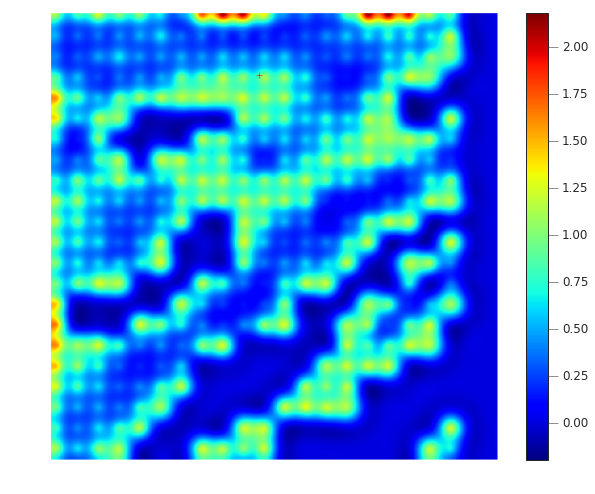

In [52]:
plt.figure(figsize=(10,8))
plt.imshow(sm_aaro[0]*10, interpolation='None')
plt.plot(9465-9000, 8138-8000,'r+')
plt.xlim(0,1000)
plt.ylim(1000,0)
plt.axis('off')
plt.colorbar()

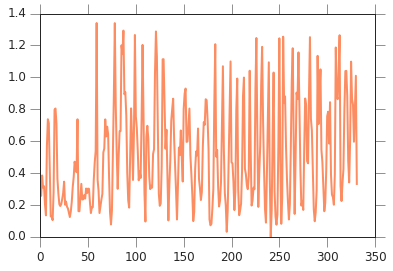

In [53]:
plt.plot(aerosols[2])

In [54]:
(sm_aaro[0]*10)[138, 465] ; 0.083

0.83715635631855134

In [65]:
pas = ['Date(dd-mm-yyyy)', 'Time(hh:mm:ss)', 'Julian_Day', 'AOT_1640', 
       'AOT_1020', 'AOT_870', 'AOT_675', 'AOT_667', 'AOT_555', 'AOT_551', 'AOT_532', 
       'AOT_531', 'AOT_500', 'AOT_490', 'AOT_443', 'AOT_440', 'AOT_412', 'AOT_380', 'AOT_340', 'Water(cm)']
df = pd.read_csv('160501_160731_NEON_OAES.dubovik', skiprows=3, na_values=["N/A"])
date = df[pas][266:274]
aero = np.array(date.AOT_1020),np.array(date.AOT_870),np.array(date.AOT_675),np.array(date.AOT_500),np.array(date.AOT_440),np.array(date.AOT_380),np.array(date.AOT_340)
wv = [ 1020,870, 675, 500, 440, 380, 340]
aero = np.array(aero).T
date

,Date(dd-mm-yyyy),Time(hh:mm:ss),Julian_Day,AOT_1640,AOT_1020,AOT_870,AOT_675,AOT_667,AOT_555,AOT_551,AOT_532,AOT_531,AOT_500,AOT_490,AOT_443,AOT_440,AOT_412,AOT_380,AOT_340,Water(cm)
266,17:07:2016,00:06:58,199.004838,0.065261,0.076196,0.088922,0.101309,NaN,NaN,NaN,NaN,NaN,0.140072,NaN,NaN,0.160496,NaN,0.192104,0.210296,2.988709
267,17:07:2016,00:37:31,199.026053,0.073013,0.088306,0.099911,0.113332,NaN,NaN,NaN,NaN,NaN,0.152870,NaN,NaN,0.173730,NaN,0.205901,0.227163,2.936079
268,17:07:2016,12:56:41,199.539363,0.050653,0.061015,0.070094,0.080917,NaN,NaN,NaN,NaN,NaN,0.116378,NaN,NaN,0.135740,NaN,0.163309,0.180752,2.707160
269,17:07:2016,13:21:54,199.556875,0.049970,0.058731,0.068527,0.079107,NaN,NaN,NaN,NaN,NaN,0.114281,NaN,NaN,0.133452,NaN,0.160982,0.177198,2.753443
270,17:07:2016,14:14:13,199.593206,0.055762,0.058612,0.071650,0.081426,NaN,NaN,NaN,NaN,NaN,0.116480,NaN,NaN,0.135337,NaN,0.163278,0.175490,2.813991
271,17:07:2016,15:44:10,199.655671,0.052331,0.050504,0.070055,0.080046,NaN,NaN,NaN,NaN,NaN,0.115314,NaN,NaN,0.135331,NaN,0.165759,0.170983,2.900663
272,17:07:2016,21:44:10,199.905671,0.053321,0.051887,0.072385,0.081495,NaN,NaN,NaN,NaN,NaN,0.116633,NaN,NaN,0.135176,NaN,0.164772,0.170089,3.100027
273,17:07:2016,22:51:36,199.952500,0.042370,0.040709,0.057539,0.065370,NaN,NaN,NaN,NaN,NaN,0.097443,NaN,NaN,0.114604,NaN,0.142653,0.150112,2.834107


/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


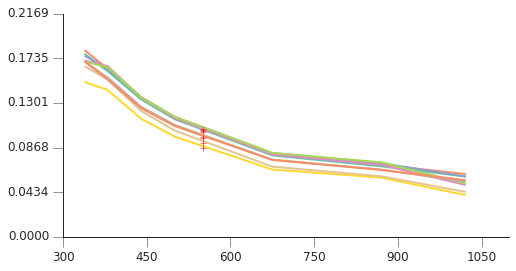

In [13]:
aot550 = []
plot_config()
#dates = ['01/03', '01/08', '01/13']
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
for i,j in enumerate(aero):
    ax.plot(wv, j)
    f = interpolate.interp1d(wv,j, kind='cubic')
    xnew = 550
    ynew = f(xnew)
    aot550.append(ynew)
    plt.plot(550, ynew, 'r+')
pretty_axes(ax)  
ax.set_yticks(np.linspace(0, 1.2*np.max(aero), 6))
plt.legend(ncol=2)

In [14]:
aot550

[array(0.10364765106139334),
 array(0.10171996245771096),
 array(0.10422931771731839),
 array(0.1030049688024631),
 array(0.10488428692514362),
 array(0.08664227973785146),
 array(0.0912570876993155),
 array(0.09731898849757754),
 array(0.09645811822428393)]

tol 1.0 nit 0
tol 2.34118797343 nit 1
tol 2.1011770818 nit 2
tol 1.99556069025 nit 3
tol 1.45549828246 nit 4
tol 1.1524114104 nit 5
tol 0.772970525052 nit 6
tol 0.554098591322 nit 7
tol 0.384292717151 nit 8
tol 0.270379523169 nit 9
tol 0.198275766832 nit 10
tol 0.141947406639 nit 11
tol 0.111444173823 nit 12
tol 0.0838679952038 nit 13
tol 0.0712165546943 nit 14
tol 0.0577937180133 nit 15
tol 0.0523870935856 nit 16
tol 0.0456088391592 nit 17
tol 0.0428545360572 nit 18
tol 0.0390626155315 nit 19
tol 0.0372583306285 nit 20
tol 0.0348476229246 nit 21
tol 0.0334466064724 nit 22
tol 0.0317402339099 nit 23
tol 0.0305717066266 nit 24
tol 0.0292704984137 nit 25
tol 0.0282716672892 nit 26
tol 0.0272296600206 nit 27
tol 0.026367533958 nit 28
tol 0.0255050672139 nit 29
tol 0.0247559652456 nit 30
tol 0.024025001447 nit 31
tol 0.0233696674259 nit 32
tol 0.0227388874711 nit 33
tol 0.0221613340604 nit 34
tol 0.0216091090978 nit 35
tol 0.0210961674796 nit 36
tol 0.0206069193314 nit 37
tol 0.02014785407

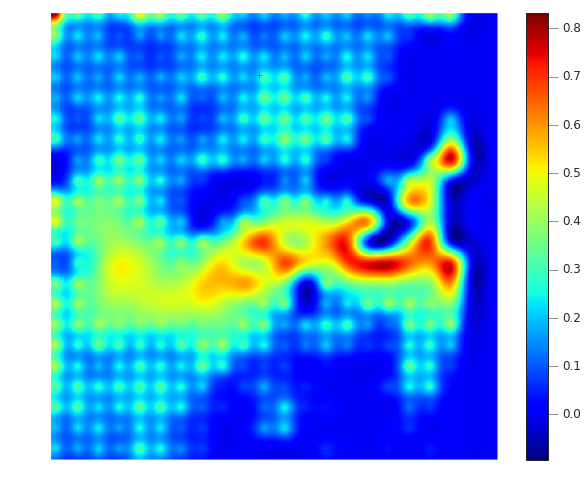

In [59]:
data = parallel_rw_pkl(None, 'NEOW-OAE0627_atm', 'r')
lat, lon = 35.41083,-99.058889
tx = mgrs.MGRS()
mg = tx.toMGRS(lat,lon, MGRSPrecision=4)
imgx = 9999-int(mg[-4:]); imgy = int(mg[-8:-4])
imgx,imgy
aerosols = np.array([[i[0], i[1], i[2][0][0]]for i in data]).T
aero_map = np.zeros((1000, 1000))
aero_map[:,:] = np.nan
aero_map[(aerosols[0]-8001).astype(int), (aerosols[1]-9001).astype(int)] = aerosols[2]
weights = (~np.isnan(aero_map)).astype('float')
sm_aaro = smoothn(aero_map,s=10,W=weights, isrobust=True)
plt.figure(figsize=(10,8))
plt.imshow(sm_aaro[0]*10, interpolation='None')
plt.plot(9465-9000, 8138-8000,'r+')
plt.xlim(0,1000)
plt.ylim(1000,0)
plt.axis('off')
plt.colorbar()
print (sm_aaro[0]*10)[138, 465]

In [ ]:
0.229664045528; 0.0975

0.220321331964


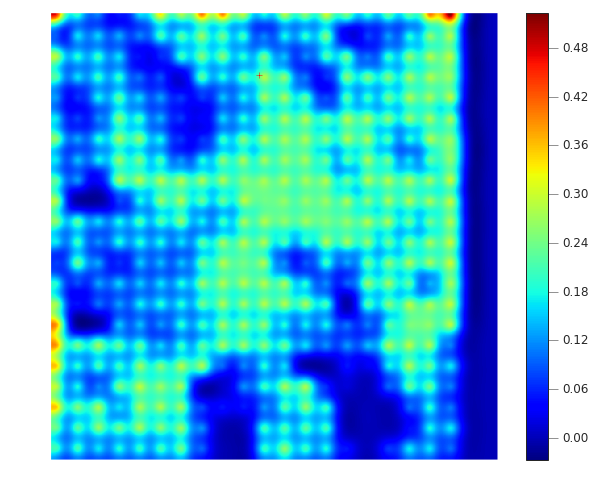

In [62]:
data = parallel_rw_pkl(None, 'NEOW-OAE0717_atm', 'r')
lat, lon = 35.41083,-99.058889
tx = mgrs.MGRS()
mg = tx.toMGRS(lat,lon, MGRSPrecision=4)
imgx = 9999-int(mg[-4:]); imgy = int(mg[-8:-4])
imgx,imgy
aerosols = np.array([[i[0], i[1], i[2][0][0]]for i in data]).T
aero_map = np.zeros((1000, 1000))
aero_map[:,:] = np.nan
aero_map[(aerosols[0]-8001).astype(int), (aerosols[1]-9001).astype(int)] = aerosols[2]
weights = (~np.isnan(aero_map)).astype('float')
sm_aaro = smoothn(aero_map,s=10,W=weights, isrobust=True)
plt.figure(figsize=(10,8))
plt.imshow(sm_aaro[0]*10, interpolation='None')
plt.plot(9465-9000, 8138-8000,'r+')
plt.xlim(0,1000)
plt.ylim(1000,0)
plt.axis('off')
plt.colorbar()
print (sm_aaro[0]*10)[138, 465]

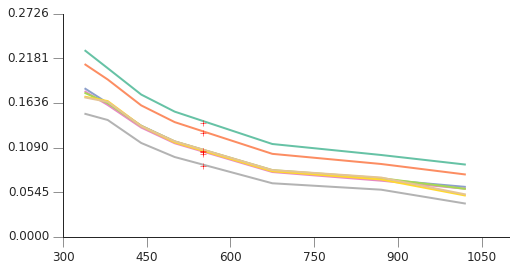

In [66]:
aot550 = []
plot_config()
#dates = ['01/03', '01/08', '01/13']
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
for i,j in enumerate(aero):
    ax.plot(wv, j)
    f = interpolate.interp1d(wv,j, kind='cubic')
    xnew = 550
    ynew = f(xnew)
    aot550.append(ynew)
    plt.plot(550, ynew, 'r+')
pretty_axes(ax)  
ax.set_yticks(np.linspace(0, 1.2*np.max(aero), 6))
plt.legend(ncol=2)

In [70]:
date

,Date(dd-mm-yyyy),Time(hh:mm:ss),Julian_Day,AOT_1640,AOT_1020,AOT_870,AOT_675,AOT_667,AOT_555,AOT_551,AOT_532,AOT_531,AOT_500,AOT_490,AOT_443,AOT_440,AOT_412,AOT_380,AOT_340,Water(cm)
266,17:07:2016,00:06:58,199.004838,0.065261,0.076196,0.088922,0.101309,NaN,NaN,NaN,NaN,NaN,0.140072,NaN,NaN,0.160496,NaN,0.192104,0.210296,2.988709
267,17:07:2016,00:37:31,199.026053,0.073013,0.088306,0.099911,0.113332,NaN,NaN,NaN,NaN,NaN,0.152870,NaN,NaN,0.173730,NaN,0.205901,0.227163,2.936079
268,17:07:2016,12:56:41,199.539363,0.050653,0.061015,0.070094,0.080917,NaN,NaN,NaN,NaN,NaN,0.116378,NaN,NaN,0.135740,NaN,0.163309,0.180752,2.707160
269,17:07:2016,13:21:54,199.556875,0.049970,0.058731,0.068527,0.079107,NaN,NaN,NaN,NaN,NaN,0.114281,NaN,NaN,0.133452,NaN,0.160982,0.177198,2.753443
270,17:07:2016,14:14:13,199.593206,0.055762,0.058612,0.071650,0.081426,NaN,NaN,NaN,NaN,NaN,0.116480,NaN,NaN,0.135337,NaN,0.163278,0.175490,2.813991
271,17:07:2016,15:44:10,199.655671,0.052331,0.050504,0.070055,0.080046,NaN,NaN,NaN,NaN,NaN,0.115314,NaN,NaN,0.135331,NaN,0.165759,0.170983,2.900663
272,17:07:2016,21:44:10,199.905671,0.053321,0.051887,0.072385,0.081495,NaN,NaN,NaN,NaN,NaN,0.116633,NaN,NaN,0.135176,NaN,0.164772,0.170089,3.100027
273,17:07:2016,22:51:36,199.952500,0.042370,0.040709,0.057539,0.065370,NaN,NaN,NaN,NaN,NaN,0.097443,NaN,NaN,0.114604,NaN,0.142653,0.150112,2.834107


In [67]:
aot550

[array(0.12671071889102775),
 array(0.13916107566661562),
 array(0.10364765106139334),
 array(0.10171996245771096),
 array(0.10422931771731839),
 array(0.1030049688024631),
 array(0.10488428692514362),
 array(0.08664227973785146)]

In [ ]:
0.220321331964; 0.10364765106139334

In [ ]:
0.83715635631855134,0.083
0.229664045528, 0.0975
0.220321331964, 0.10364765106139334